In [1]:
# First import OpenCV, NumPY and MatPlotLib as we will use these libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

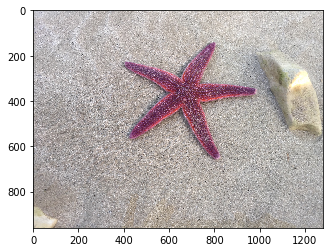

In [2]:
# Load a color image
img = cv2.imread("./images/starfish.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

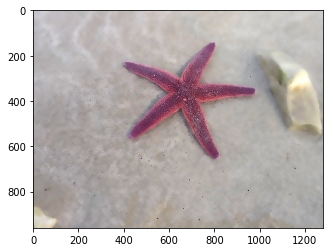

In [3]:
# Apply some blurring to reduce noise

# h is the Parameter regulating filter strength for luminance component. 
# Bigger h value perfectly removes noise but also removes image details, 
# smaller h value preserves details but also preserves some noise

# Hint: I recommend using larger h and hColor values than typical to remove noise at the
# expense of losing image details

# Experiment with setting h and hColor to a suitable value.

# Exercise: Insert code here to set values for h and hColor. 
# Hint: You'll find answers at the bottom of the lab. 
    
h = 16
hColor = 32
# Default values
templateWindowSize = 7
searchWindowSize = 21
    
blur = cv2.fastNlMeansDenoisingColored(img, None,h,hColor,templateWindowSize,searchWindowSize)
    
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

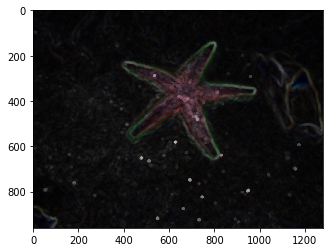

In [4]:
# Apply a morphological gradient (dilate the image, erode the image, and take the difference

elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))

# YOUR CODE HERE
# Exercise: Use openCV's morphologyEx to generate a gradient using the kernel above
# Hint: You'll find answers at the bottom of the lab. 

# END YOUR CODE HERE
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, elKernel)

plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))

In [5]:
gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)

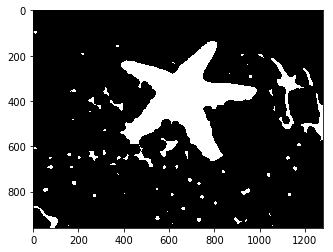

In [6]:
# Apply Otsu's method - or you can adjust the level at which thresholding occurs
# and see what the effect of this is

# YOUR CODE HERE
# Exercise: Generate a matrix called otsu using OpenCV's threshold() function.  Use
# Otsu's method.
# Hint: You'll find answers at the bottom of the lab. 

# END YOUR CODE HERE
thres, otsu = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Apply a closing operation - we're using a large kernel here. By all means adjust the size of this kernel
# and observe the effects
closingKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (33,33))
close = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, closingKernel) 

plt.imshow(close, cmap='gray')

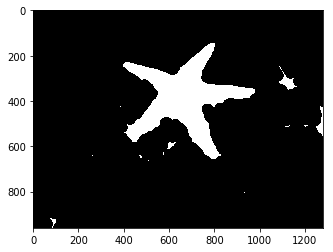

In [7]:
# Erode smaller artefacts out of the image - play with iterations to see how it works
    
# YOUR CODE HERE
# Exercise: Generate a matrix called eroded using cv2.erode() function over the 'close' matrix.
# Experiment until your output image is similar to the image below
# Hint: You'll find answers at the bottom of the lab. 
eroded = cv2.erode(close, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17)))
# END YOUR CODE HERE

plt.imshow(eroded, cmap='gray')

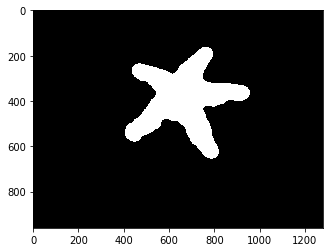

In [8]:
opened = cv2.morphologyEx(close, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (33,33)), None, None, 2)
plt.imshow(opened, cmap='gray')

In [9]:
# YOUR CODE HERE
# Exercise: Find the contours - just external contours to keep post-processing simple
# Hint: You'll find answers at the bottom of the lab. 
_, contours, hierarchy = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# END YOUR CODE HERE

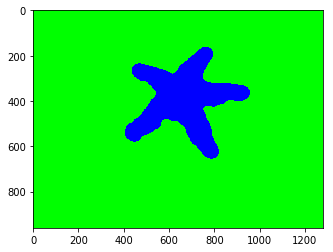

In [10]:
# Sort the candidates by size, and just keep the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

# Lets create two images, initially all zeros (i.e. black)
# One image will be filled with 'Blue' wherever we think there's some starfish
# The other image will be filled with 'Green' whereever we think there's not some starfish
h, w, num_c = img.shape
segmask = np.zeros((h, w, num_c), np.uint8)
stencil = np.zeros((h, w, num_c), np.uint8)

# I know we've only one contour, but - in general - we'd expect to have more contours to deal with
for c in contours:
    # Fill in the starfish shape into segmask
    cv2.drawContours(segmask, [c], 0, (255, 0, 0), -1)
    # Lets fill in the starfish shape into stencil as well
    # and then re-arrange the colors using numpy
    cv2.drawContours(stencil, [c], 0, (255, 0, 0), -1)
    stencil[np.where((stencil==[0,0,0]).all(axis=2))] = [0, 255, 0]
    stencil[np.where((stencil==[255,0,0]).all(axis=2))] = [0, 0, 0]

# Now, lets create a mask image by bitwise ORring segmask and stencil together
mask = cv2.bitwise_or(stencil, segmask)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

In [11]:
# Now, lets just blend our original image with our mask

# YOUR CODE HERE
# Exercise: Blend the original image 'img' and our mask 'mask'
# in any way you see fit, and store it in a variable called output
# Hint: You'll find answers at the bottom of the lab. 
output = (img * 0.7 + mask * 0.3).astype(np.uint8)
# END YOUR CODE HERE

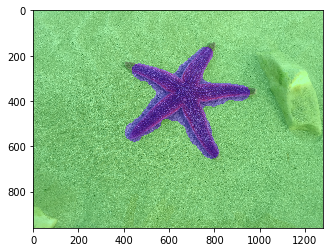

In [12]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))